# Practical-Deep-Learning-for-Coders-Lesson1

> Practical Deep Learning for Coders Lesson1

This file will become your README and also the index of your documentation.

## Is it a bird

```sh
pip install Practical_Deep_Learning_for_Coders_Lesson1
```

In [ ]:
from fastbook import *

In [ ]:
urls = search_images_ddg('bird photos', max_images=1)
len(urls),urls[0]

(1, 'http://www.birdwallpapers.com/wallpapers/bird-photos.jpg')

In [ ]:
dest=Path('bird.jpg')
download_url(urls[0],dest,show_progress=False)

Path('bird.jpg')

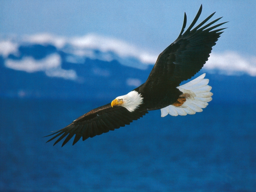

In [ ]:
im = Image.open(dest)
im.to_thumb(256,256)

In [ ]:
searches = 'forest','bird'
path = Path('bird_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    results = search_images_ddg(f'{o} photo',max_images=20)
    download_images(dest, urls=results[:20])        
    resize_images(dest, max_size=400, dest=dest)       


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#0) []

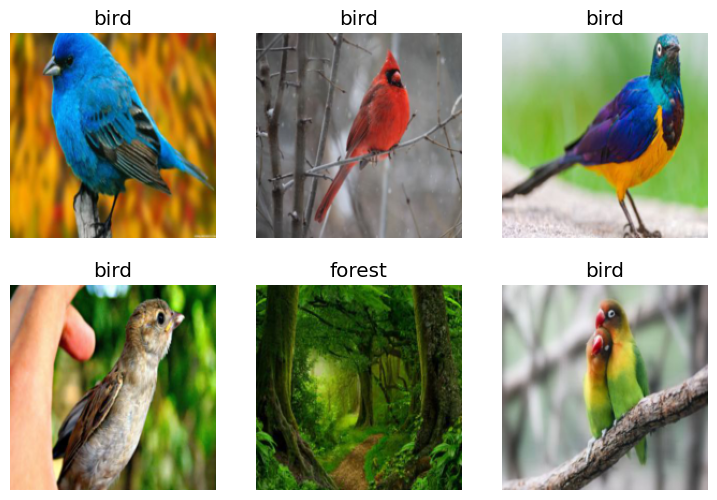

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.577089,2.165102,0.571429,00:01


epoch,train_loss,valid_loss,error_rate,time
0,1.055121,1.730857,0.571429,00:01
1,0.770361,0.968586,0.428571,00:01
2,0.525786,0.445994,0.285714,00:01


In [ ]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000
